In [1]:
import numpy as np
import sympy as sp
# import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.animation as animation

sp.init_printing(use_latex="mathjax")
%matplotlib widget

In [2]:
x, y, z, f = sp.symbols("x y z f")

# 1


In [3]:
z = x * y + y**2

z_func = sp.lambdify((x, y), z, "numpy")

## Solve


In [4]:
start_point = np.array([5.0, 5.0])
lr = 1e-3
eps = 1e-6
max_iter = 1000

In [5]:
grid = [sp.diff(z, var) for var in (x, y)]
grid_func = sp.lambdify((x, y), grid, "numpy")

display(grid)

[y, x + 2⋅y]

In [6]:
path = [np.append(start_point, z_func(*start_point))]

for i in range(max_iter):
    prev = path[-1]
    prev_xy = prev[:2]
    grid_val = np.array(grid_func(*prev_xy), dtype=float)
    path.append(prev_xy - lr * grid_val)
    cur_xy = path[-1]
    path[-1] = np.append(cur_xy, z_func(*cur_xy))
    if abs(path[-1][-1] - prev[-1]) < eps:
        break

path = np.array(path)

display(path[-1])

array([ 4.00556863, -1.02858446, -3.06207965])

## Plot


In [7]:
x_grid, y_grid = np.meshgrid(np.linspace(-6, 6, 1000), np.linspace(-6, 6, 1000))

z_grid = z_func(x_grid, y_grid)

In [8]:
# fig = go.Figure()
# fig.add_trace(
#     go.Surface(
#         x=x_grid,
#         y=y_grid,
#         z=z_grid,
#         colorscale="viridis",
#         opacity=0.85,
#         colorbar=dict(len=0.75),
#     )
# )
# fig.add_trace(
#     go.Scatter3d(
#         x=path[:, 0],
#         y=path[:, 1],
#         z=path[:, 2],
#         mode="lines+markers",
#         line=dict(width=1, color="red"),
#         marker=dict(size=2, color="red"),
#         name="GD Path",
#         showlegend=True,
#     )
# )

# fig.update_layout(
#     title="GD plot",
#     scene=dict(xaxis_title="x", yaxis_title="y", zaxis_title="z"),
#     width=800,
#     height=600,
# )
# fig.show()

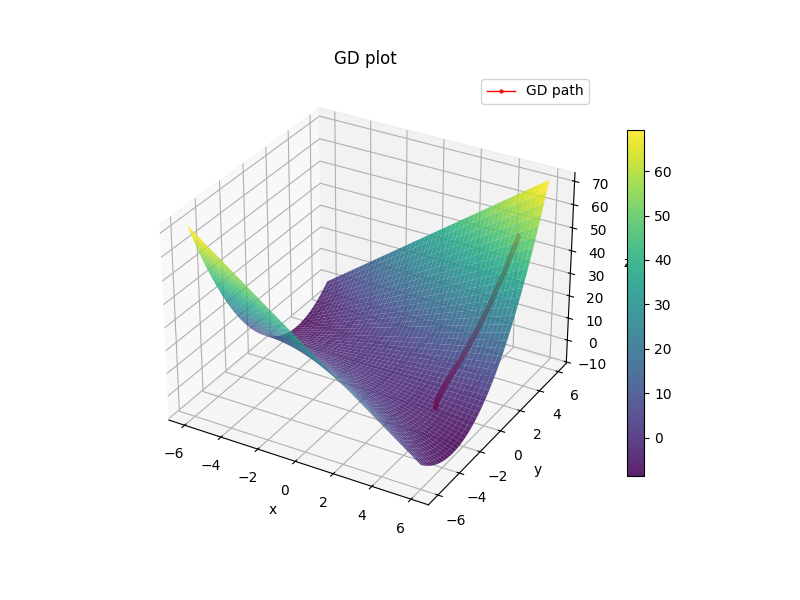

In [9]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(x_grid, y_grid, z_grid, cmap="viridis", alpha=0.875)
ax.plot(
    path[:, 0],
    path[:, 1],
    path[:, 2],
    color="red",
    marker="o",
    markersize=2,
    linewidth=1,
    label="GD path",
)

fig.colorbar(surf, shrink=0.75)
ax.set_title("GD plot")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.legend()
plt.show()

## Animate


In [10]:
# fig = go.Figure()
# fig.add_trace(
#     go.Surface(
#         x=x_grid[::10],
#         y=y_grid[::10],
#         z=z_grid[::10],
#         colorscale="viridis",
#         opacity=0.85,
#         name="f",
#         colorbar=dict(len=0.75),
#     )
# )
# fig.add_trace(
#     go.Scatter3d(
#         x=[path[0, 0]],
#         y=[path[0, 1]],
#         z=[path[0, 2]],
#         mode="lines+markers",
#         marker=dict(size=2, color="red"),
#         line=dict(width=1, color="blue"),
#         name="GD path",
#         showlegend=True,
#     )
# )

# frames = []
# for i in range(10, len(path), 10):
#     cur_path = path[: i + 1 : 10]
#     frame = go.Frame(
#         data=[go.Scatter3d(x=cur_path[:, 0], y=cur_path[:, 1], z=cur_path[:, 2])],
#         traces=[1],
#         name=str(i),
#     )
#     frames.append(frame)
# fig.frames = frames

# fig.update_layout(
#     title="GD animation",
#     scene=dict(xaxis_title="x", yaxis_title="y", zaxis_title="z"),
#     width=800,
#     height=600,
#     updatemenus=[
#         {
#             "type": "buttons",
#             "showactive": True,
#             "y": -0.15,
#             "x": 1.15,
#             "xanchor": "right",
#             "yanchor": "bottom",
#             "buttons": [
#                 {
#                     "label": "Play",
#                     "method": "animate",
#                     "args": [
#                         None,
#                         {
#                             "frame": {"duration": 250, "redraw": True},
#                             "fromcurrent": True,
#                             "transition": {"duration": 0},
#                         },
#                     ],
#                 },
#                 {
#                     "label": "Pause",
#                     "method": "animate",
#                     "args": [
#                         [None],
#                         {
#                             "frame": {"duration": 0, "redraw": False},
#                             "mode": "immediate",
#                             "transition": {"duration": 0},
#                         },
#                     ],
#                 },
#             ],
#         }
#     ],
#     sliders=[
#         {
#             "active": 0,
#             "y": 0,
#             "len": 0.9,
#             "x": 0.05,
#             "steps": [
#                 {
#                     "label": str(k),
#                     "method": "animate",
#                     "args": [
#                         [str(k)],
#                         {
#                             "frame": {"duration": 0, "redraw": True},
#                             "mode": "immediate",
#                         },
#                     ],
#                 }
#                 for k in range(len(path))
#             ],
#         }
#     ],
# )
# fig.show()

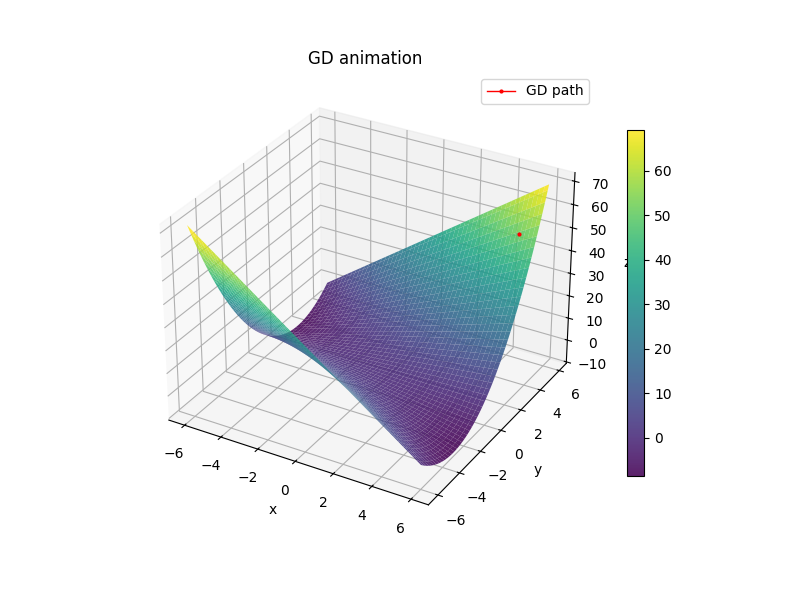

In [11]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(
    x_grid[::10], y_grid[::10], z_grid[::10], cmap="viridis", alpha=0.875
)
(line,) = ax.plot(
    [path[0][0]],
    [path[0][1]],
    [path[0][2]],
    color="red",
    marker="o",
    markersize=2,
    linewidth=1,
    label="GD path",
    zorder=10,
)
ani = animation.FuncAnimation(
    fig,
    lambda frame: (
        line.set_data(
            path[: (11 * frame + 1) : 10, 0],
            path[: (11 * frame + 1) : 10, 1],
        ),
        line.set_3d_properties(path[: (11 * frame + 1) : 10, 2]),
        line,
    )[-1:],
    frames=len(path) // 10,
    interval=250,
    blit=True,
    repeat=False,
)

fig.colorbar(surf, shrink=0.75)
ax.set_title("GD animation")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.legend()
plt.show()